In [1]:
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
sns.set_style("darkgrid")

# Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­ minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

# Determine file structure

In [2]:
with open('logins.json', 'r') as f: 
    f = json.load(f)

# Look at the file structure
print(f.keys())

dict_keys(['login_time'])


In [3]:
# What type is login_time 
print(type(f['login_time']))

<class 'list'>


In [4]:
# Look at the first item in the list and figure out if there is additional nesting
print(f['login_time'][0], type(f['login_time'][0]))

1970-01-01 20:13:18 <class 'str'>


File is json with just login information and no additional data.  Read the data in so we get one single column of data

# Create dataframe

In [5]:
data = pd.DataFrame(f['login_time'], columns = ['TimeStamp'])

In [6]:
# Convert str to datetime
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

In [7]:
# Round to 15 minute intervals
data['TS_Rounded'] = data['TimeStamp'].dt.round('15min')
data['TS'] = data['TS_Rounded'].dt.strftime("%H:%M:%S")

In [8]:
# How many unique dates do we have? 
print("Number of unique months: {0}".format(len(data['TS_Rounded'].dt.month.unique())))
print("Number of unique dates: {0}".format(len(data['TS_Rounded'].dt.date.unique())))

Number of unique months: 4
Number of unique dates: 103


In [9]:
# Look at the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 3 columns):
TimeStamp     93142 non-null datetime64[ns]
TS_Rounded    93142 non-null datetime64[ns]
TS            93142 non-null object
dtypes: datetime64[ns](2), object(1)
memory usage: 2.1+ MB


In [10]:
# Describe the variables
data.describe()

,TimeStamp,TS_Rounded,TS
count,93142,93142,93142
unique,92265,9376,96
top,1970-02-12 11:16:53,1970-03-01 04:45:00,22:30:00
freq,3,67,1708
first,1970-01-01 20:12:16,1970-01-01 20:15:00,NaN
last,1970-04-13 18:57:38,1970-04-13 19:00:00,NaN


# Calculate the interaction per time of day

In [11]:
# Get the count per timestamp per day 
daily_patterns = data['TS'].value_counts().to_frame()
daily_patterns.reset_index(inplace = True)
daily_patterns.sort_values('index', ascending=True, inplace = True)

# Plot overall usage per time of day

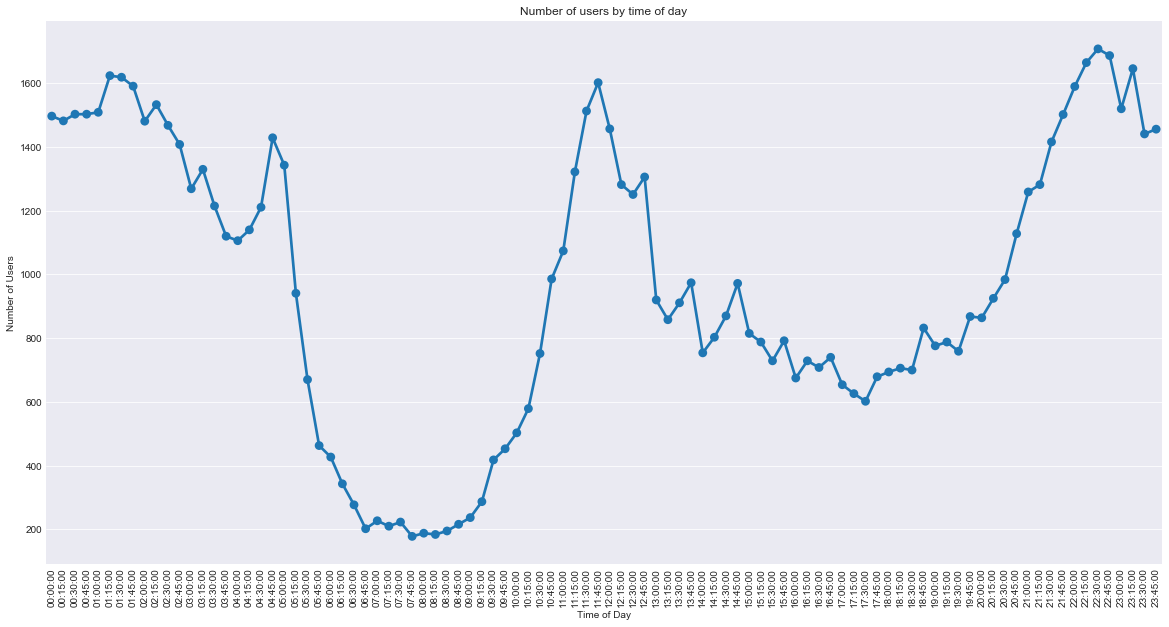

In [12]:
plt.figure(figsize=(20,10))
g = sns.pointplot(data = daily_patterns, y = 'TS', x = 'index')
plt.xticks(rotation=90);
plt.ylabel('Number of Users');
plt.xlabel('Time of Day');
plt.title("Number of users by time of day");

# Monthly patterns

In [13]:
monthly_patterns = data.groupby(data['TimeStamp'].dt.month)['TS'].value_counts().to_frame(name='Cnt')

In [14]:
monthly_patterns.reset_index(inplace=True)
monthly_patterns.sort_values(['TS', 'Cnt'], ascending=[True, True], inplace = True)

In [15]:
monthly_patterns.rename(columns = {'TimeStamp':'Month'}, inplace = True);

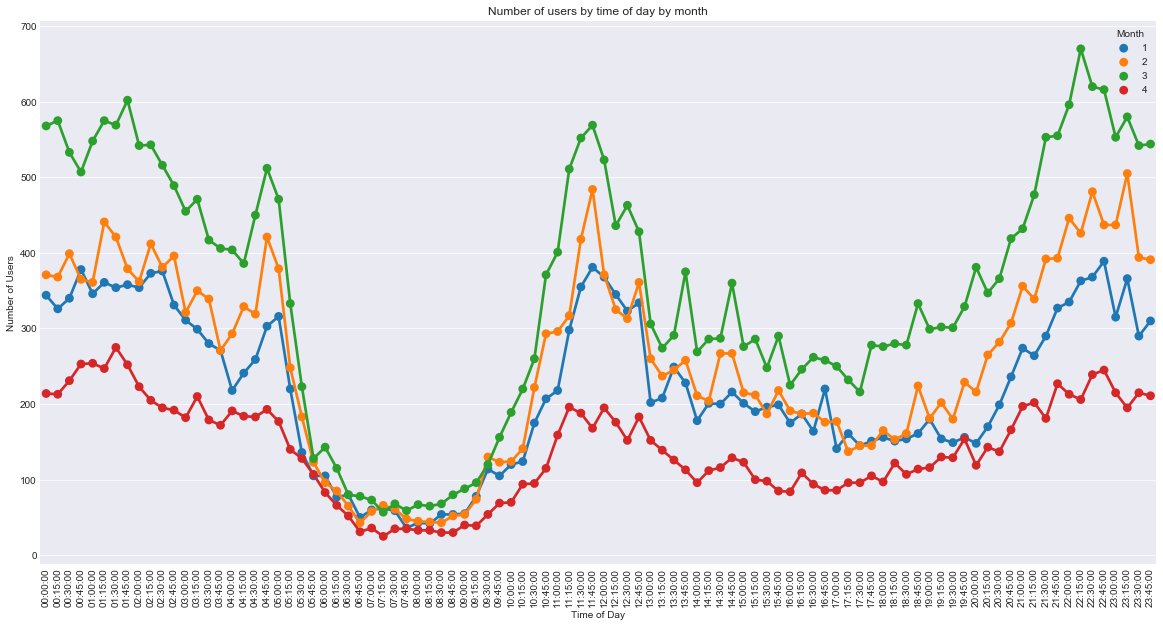

In [16]:
plt.figure(figsize=(20,10))
sns.pointplot(data = monthly_patterns, x = 'TS', y = 'Cnt', hue='Month')
plt.xticks(rotation=90);
plt.ylabel('Number of Users');
plt.xlabel('Time of Day');
plt.title("Number of users by time of day by month");

# Day of week

In [17]:
dayofweek_patterns = data.groupby(data['TimeStamp'].dt.dayofweek)['TS'].value_counts().to_frame(name='Cnt')

In [18]:
dayofweek_patterns.reset_index(inplace=True)
dayofweek_patterns.sort_values(['TS', 'Cnt'], ascending=[True, True], inplace = True)

In [19]:
dayofweek_patterns.rename(columns = {'TimeStamp':'DayOfWeek'}, inplace = True);

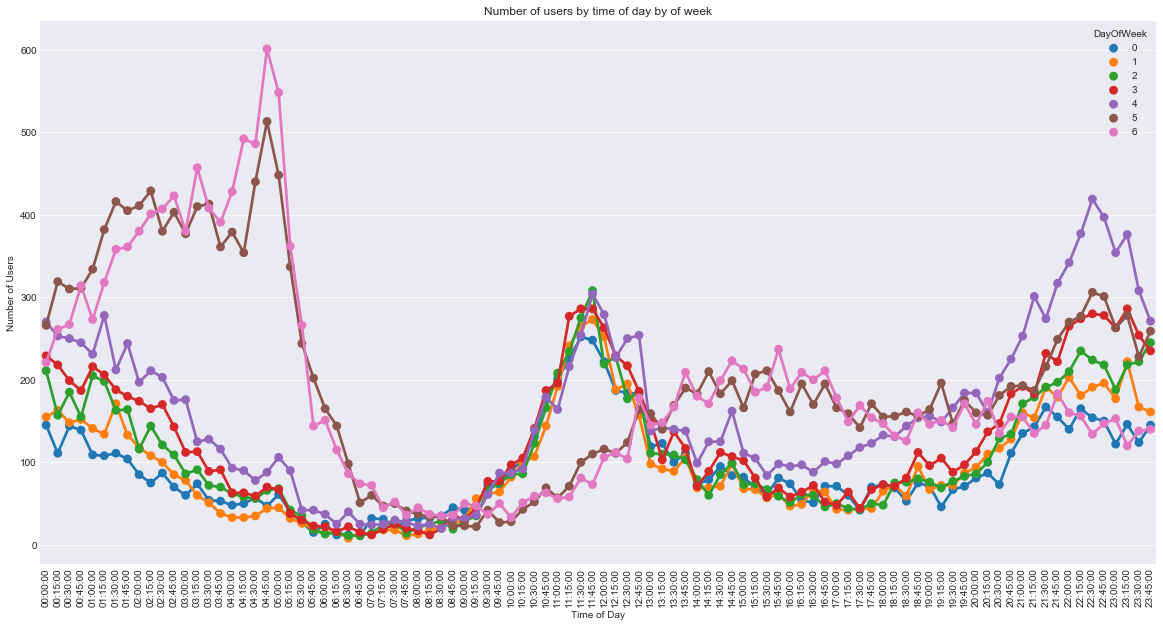

In [20]:
plt.figure(figsize=(20,10))
sns.pointplot(data = dayofweek_patterns, x = 'TS', y = 'Cnt', hue='DayOfWeek')
plt.xticks(rotation=90);
plt.ylabel('Number of Users');
plt.xlabel('Time of Day');
plt.title("Number of users by time of day by of week");